In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [16]:
from fastai.conv_learner import *
PATH = Path("data/plantvillage/crowdai/")
arch = resnext50
bs = 32
sz = 224

In [19]:
ls {PATH}

models/  pato_1._crop.jpeg*  pato_1.jpeg*  tmp/  train/  val/


In [18]:
classes = [f'c_{k}' for k in range(0, 38)]

In [21]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.2)
    return ImageClassifierData.from_paths(PATH, tfms=tfms, val_name='val')

In [22]:
data = get_data(sz, bs)

In [23]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.lr_find(wds=1e-4, end_lr=100)

100%|██████████| 50/50 [01:18<00:00,  1.57s/it]


HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 76%|███████▌  | 222/293 [01:26<00:27,  2.55it/s, loss=5.51]

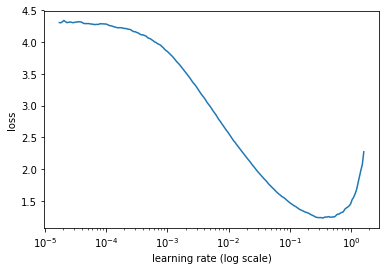

In [24]:
learn.sched.plot()

In [25]:
lr = 0.05